### Load required Libraries

In [12]:
#Import pandas to read the dataset
import pandas as pd
#Import numpy
import numpy as np
#Import sklearn for machine learning algorithm
import sklearn
#Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Import sklearn metrics module for accuracy calculation
from sklearn import metrics
#Import classification report module to calculate precision, f1 score, etc.
from sklearn.metrics import classification_report
#Import confusion matrix module to generate confusion matrix
from sklearn.metrics import confusion_matrix
#Import SMOTE for Oversampling for imbalanced classification
from imblearn.over_sampling import SMOTE
#Import MLPClassifier to solve classification problem using Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier
#Import pyplot for data visualization
import matplotlib.pyplot as plt

#Disable chained_assignment warning that may distract reading
pd.options.mode.chained_assignment = None

### Step 1: Obtain Data

In [5]:
LoanData = pd.read_csv("/Users/phuonglucydoan/Desktop/STUDY/Spring 2020/Courses/8810 - Python in Marketing Analytics/Case Study/Case Study 1/CS1 - LoanData.csv")

In [6]:
LoanData.sample(5)

,Age,DebtRatio,LOC,Income,MREL,Dependents,Utilization,30Day,60Day,90Day,Risk
92361,21,34.000000,1,NaN,0,0.0,1.000000,0,0,0,1
2701,60,0.427234,8,11000.0,2,0.0,0.040603,0,0,0,0
14215,38,0.430214,11,3216.0,1,3.0,0.185868,0,0,0,1
81151,56,0.432027,9,6200.0,2,0.0,0.318319,0,0,0,0
74511,31,0.207647,4,6250.0,0,0.0,0.883178,0,0,0,0


### Step 2: Data pre-processing

#### 2.1. Check column names

In [7]:
#Check column names for any typos
LoanData.columns

Index(['Age', 'DebtRatio', 'LOC', 'Income', 'MREL', 'Dependents ',
       'Utilization', '30Day', '60Day', '90Day', 'Risk'],
      dtype='object')

In [8]:
#Delete blank spaces in column names
LoanData = LoanData.rename(columns={'Dependents ':'Dependents'})

In [9]:
LoanData.columns

Index(['Age', 'DebtRatio', 'LOC', 'Income', 'MREL', 'Dependents',
       'Utilization', '30Day', '60Day', '90Day', 'Risk'],
      dtype='object')

#### 2.2. Handle input errors in data type

In [10]:
#Data summary
LoanData.describe()

,Age,DebtRatio,LOC,Income,MREL,Dependents,Utilization,30Day,60Day,90Day,Risk
count,100000.000000,100000.000000,100000.000000,8.009800e+04,100000.000000,97416.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,52.279570,359.624790,8.424920,6.689975e+03,1.016750,0.760358,6.115302,0.418810,0.23807,0.265630,0.066550
std,14.742859,2339.815864,5.121764,1.637884e+04,1.127538,1.117592,255.249894,4.178854,4.14121,4.156193,0.249242
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,41.000000,0.175075,5.000000,3.400000e+03,0.000000,0.000000,0.030106,0.000000,0.00000,0.000000,0.000000
50%,52.000000,0.366529,8.000000,5.400000e+03,1.000000,0.000000,0.154768,0.000000,0.00000,0.000000,0.000000
75%,63.000000,0.874209,11.000000,8.264750e+03,2.000000,1.000000,0.560238,0.000000,0.00000,0.000000,0.000000
max,109.000000,329664.000000,58.000000,3.008750e+06,54.000000,20.000000,50708.000000,98.000000,98.00000,98.000000,1.000000


In [13]:
#Since maximum values of Debt Ratio and Utilization are bigger than 1 while they should not, there must be input errors
#Convert any bigger-than-1 value of DebtRatio and Utilization variables into null values
for i in range(0,len(LoanData)):
    for f in ['DebtRatio','Utilization']:
        if LoanData[f][i] > 1:
            LoanData[f][i] = np.nan
            
LoanData.describe()

,Age,DebtRatio,LOC,Income,MREL,Dependents,Utilization,30Day,60Day,90Day,Risk
count,100000.000000,76507.000000,100000.000000,8.009800e+04,100000.000000,97416.000000,97807.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,52.279570,0.302661,8.424920,6.689975e+03,1.016750,0.760358,0.304342,0.418810,0.23807,0.265630,0.066550
std,14.742859,0.226218,5.121764,1.637884e+04,1.127538,1.117592,0.338206,4.178854,4.14121,4.156193,0.249242
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,41.000000,0.125853,5.000000,3.400000e+03,0.000000,0.000000,0.028822,0.000000,0.00000,0.000000,0.000000
50%,52.000000,0.273918,8.000000,5.400000e+03,1.000000,0.000000,0.144825,0.000000,0.00000,0.000000,0.000000
75%,63.000000,0.437171,11.000000,8.264750e+03,2.000000,1.000000,0.521300,0.000000,0.00000,0.000000,0.000000
max,109.000000,1.000000,58.000000,3.008750e+06,54.000000,20.000000,1.000000,98.000000,98.00000,98.000000,1.000000


In [14]:
#Check data types
LoanData.dtypes

Age              int64
DebtRatio      float64
LOC              int64
Income         float64
MREL             int64
Dependents     float64
Utilization    float64
30Day            int64
60Day            int64
90Day            int64
Risk             int64
dtype: object

In [15]:
#Since Dependents variable should be integer, let's check if there is any decimal value in this variable
a=0
b=0
for i in range(0,len(LoanData)):
    if np.isnan(LoanData['Dependents'][i]):
        b+=1
    elif LoanData['Dependents'][i] %1 != 0:
        a+=1
print("There are", a, "decimal values and", b, "null values")

There are 0 decimal values and 2584 null values


In [16]:
#Since Dependent variable has missing values, we'll change its data type after handing these missing values

#### 2.3. Handle missing data

In [17]:
#Count missing values in each variable
LoanData.isnull().sum()

Age                0
DebtRatio      23493
LOC                0
Income         19902
MREL               0
Dependents      2584
Utilization     2193
30Day              0
60Day              0
90Day              0
Risk               0
dtype: int64

- LoanData1

In [18]:
#Discard incomplete rows to create the first cleaned dataset named "LoanData1"
LoanData1 = LoanData.dropna()

In [19]:
LoanData1.isnull().sum()

Age            0
DebtRatio      0
LOC            0
Income         0
MREL           0
Dependents     0
Utilization    0
30Day          0
60Day          0
90Day          0
Risk           0
dtype: int64

In [20]:
#Change Dependents variable from float type to integer type
LoanData1["Dependents"] = LoanData1["Dependents"].astype("int64")

In [21]:
LoanData1.dtypes

Age              int64
DebtRatio      float64
LOC              int64
Income         float64
MREL             int64
Dependents       int64
Utilization    float64
30Day            int64
60Day            int64
90Day            int64
Risk             int64
dtype: object

- LoanData2

In [22]:
#Create 2nd cleaned dataset named "LoanData2" which is copied from LoanData
LoanData2 = LoanData.copy()

In [23]:
#Calculate the percentage of missing values in each variable
print("The Debt Ratio variable contains",
      round((LoanData2.Age.count() - LoanData2.DebtRatio.count())/ LoanData2.Age.count() *100),
      "%","missing values")
print("The Income variable contains",
      round((LoanData2.Age.count() - LoanData2.Income.count())/ LoanData2.Age.count() *100),
      "%","missing values")
print("The Dependents variable contains",
      round((LoanData2.Age.count() - LoanData2.Dependents.count())/ LoanData2.Age.count() *100),
      "%","missing values")
print("The Utilization variable contains",
      round((LoanData2.Age.count() - LoanData2.Utilization.count())/ LoanData2.Age.count() *100),
      "%","missing values")

The Debt Ratio variable contains 23.0 % missing values
The Income variable contains 20.0 % missing values
The Dependents variable contains 3.0 % missing values
The Utilization variable contains 2.0 % missing values


In [24]:
#Delete the Debt Ratio and Income variable because it has more than 10% missing values
LoanData2 = LoanData2.drop(["DebtRatio","Income"], axis=1)

In [25]:
#For Dependents and Utilization variables, impute missing values with their median value
LoanData2["Dependents"] = LoanData2.fillna(LoanData2["Dependents"].median())
LoanData2["Utilization"] = LoanData2.fillna(LoanData2["Utilization"].median())

In [26]:
LoanData2.isnull().sum()

Age            0
LOC            0
MREL           0
Dependents     0
Utilization    0
30Day          0
60Day          0
90Day          0
Risk           0
dtype: int64

In [27]:
#Change Dependents variable from float type to integer type
LoanData2["Dependents"] = LoanData2["Dependents"].astype("int64")

In [28]:
LoanData2.dtypes

Age              int64
LOC              int64
MREL             int64
Dependents       int64
Utilization    float64
30Day            int64
60Day            int64
90Day            int64
Risk             int64
dtype: object

#### 2.4. Handle imbalanced dataset

- LoanData3

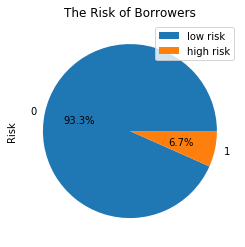

In [29]:
#The pie chart shows imbalanced dataset with a ratio of 1(high risk):15(low risk)
LoanData2.Risk.value_counts().plot.pie(autopct='%1.1f%%', title="The Risk of Borrowers")
plt.legend(("low risk","high risk"))

In [30]:
#Upsampling, using SMOTE library, by increasing the minority class (1 - high risk)
X = pd.DataFrame(LoanData2.iloc[:,:-1])
y = pd.DataFrame(LoanData2.iloc[:,-1])

sm = SMOTE(random_state=8810, sampling_strategy = 0.2) #Ratio of minority:majority = 1:5
X_res, y_res = sm.fit_sample(X,y)

In [31]:
#Check the ratio after resampling to see if we obtain the desired ratio
print("For every 1 high risk, there will be",
      len(y_res[y_res.Risk == 0]) / len(y_res[y_res.Risk == 1]), "low risk")

For every 1 high risk, there will be 5.0 low risk


In [32]:
#Create LoanData3 by merging horizontally 2 dataframes X_res and y_res
LoanData3 = pd.concat([X_res,y_res], axis=1)

In [33]:
LoanData3.isnull().sum()

Age            0
LOC            0
MREL           0
Dependents     0
Utilization    0
30Day          0
60Day          0
90Day          0
Risk           0
dtype: int64

### Step 3: Split the processed data into training and testing data

In [34]:
#For LoanData1 dataset
X1 = pd.DataFrame(LoanData1.iloc[:,:-1])
y1 = pd.DataFrame(LoanData1.iloc[:,-1])

X_train1, X_test1, y_train1, y_test1=train_test_split(X1,y1, test_size=0.3, random_state=8810)

In [35]:
#For LoanData2 dataset
X2 = pd.DataFrame(LoanData2.iloc[:,:-1])
y2 = pd.DataFrame(LoanData2.iloc[:,-1])

X_train2, X_test2, y_train2, y_test2=train_test_split(X2,y2, test_size=0.3, random_state=8810)

In [36]:
#For LoanData3 dataset
X3 = pd.DataFrame(LoanData3.iloc[:,:-1])
y3 = pd.DataFrame(LoanData3.iloc[:,-1])

X_train3, X_test3, y_train3, y_test3=train_test_split(X3,y3, test_size=0.3, random_state=8810)

### Step 4: Learn from training datasets

#### 4.1. Random Forest Classifier

In [37]:
#For LoanData1 dataset
RF1_class = RandomForestClassifier(n_estimators=50)
RF1_class = RF1_class.fit(X_train1, y_train1)

#For LoanData2 dataset
RF2_class = RandomForestClassifier(n_estimators=50)
RF2_class = RF2_class.fit(X_train2, y_train2)

#For LoanData3 dataset
RF3_class = RandomForestClassifier(n_estimators=50)
RF3_class = RF3_class.fit(X_train3, y_train3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


#### 4.2. Multi-layer Perceptron Classifier

In [39]:
#Determine number of hidden layers and number of hidden nodes in each layer, based on Accuracy Score, using LoanData1
df = pd.DataFrame(columns=["firstLayer_N","2ndLayer_0N","2ndLayer_1N","2ndLayer_2N","2ndLayer_3N","2ndLayer_4N"
                           ,"2ndLayer_5N"])

for i in range(7):           #i is the number of nodes in second hidden layer
    for j in range(1,21):    #j is the number of nodes in first hidden layer
        if i == 0:
            df[df.columns[i]] = range(1,21)
        elif i == 1:
            MLP1_class = MLPClassifier(hidden_layer_sizes=(j), solver='lbfgs', alpha=1e-05, random_state=8810
                                       , max_iter=500).fit(X_train1, y_train1)
            y_pred_MLP1 = MLP1_class.predict(X_test1)
            Accuracy_MLP1 = metrics.accuracy_score(y_test1, y_pred_MLP1)
            df[df.columns[i]][j-1] = Accuracy_MLP1
        else:
            MLP1_class = MLPClassifier(hidden_layer_sizes=(j,i), solver='lbfgs', alpha=1e-05, random_state=8810
                                       , max_iter=500).fit(X_train1, y_train1)
            y_pred_MLP1 = MLP1_class.predict(X_test1)
            Accuracy_MLP1 = metrics.accuracy_score(y_test1, y_pred_MLP1)
            df[df.columns[i]][j-1] = Accuracy_MLP1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [605]:
#Based on the Accuracy table, the local maximum score, 0.93874, shows up in a few pairs, one of which is (5,2)
df

,firstLayer_N,2ndLayer_0N,2ndLayer_1N,2ndLayer_2N,2ndLayer_3N,2ndLayer_4N,2ndLayer_5N
0,1,0.93874,0.93874,0.93874,0.93874,0.93874,0.93874
1,2,0.0612596,0.0625283,0.93874,0.93874,0.937472,0.93874
2,3,0.937608,0.93874,0.93874,0.937336,0.0614862,0.937925
3,4,0.93874,0.93874,0.93874,0.0632533,0.0612596,0.938469
4,5,0.938514,0.937653,0.0612596,0.93874,0.93874,0.0612596
5,6,0.937653,0.93874,0.93874,0.937426,0.880788,0.0623924
6,7,0.0613049,0.114318,0.937517,0.93874,0.938695,0.937608
7,8,0.0622565,0.0612596,0.938695,0.0623924,0.937653,0.936565
8,9,0.0639329,0.937608,0.93874,0.937381,0.93874,0.936022
9,10,0.938695,0.937608,0.93874,0.313638,0.0623924,0.937744


In [41]:
#Train 3 datasets with the MLP Classifier

#For LoanData1 dataset
MLP1_class = MLPClassifier(hidden_layer_sizes=(5,2), solver='lbfgs', alpha=1e-05, random_state=8810, max_iter=500)
MLP1_class = MLP1_class.fit(X_train1, y_train1)

#For LoanData2 dataset
MLP2_class = MLPClassifier(hidden_layer_sizes=(5,2), solver='lbfgs', alpha=1e-05, random_state=8810, max_iter=500)
MLP2_class = MLP2_class.fit(X_train2, y_train2)

#For LoanData3 dataset
MLP3_class = MLPClassifier(hidden_layer_sizes=(5,2), solver='lbfgs', alpha=1e-05, random_state=8810, max_iter=500)
MLP3_class = MLP3_class.fit(X_train3, y_train3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Step 5: Make predictions using testing datasets

In [42]:
#Making predictions on 3 datasets using Random Forest and MLP Classifiers
y_pred_RF1 = RF1_class.predict(X_test1)
y_pred_MLP1 = MLP1_class.predict(X_test1)

y_pred_RF2 = RF2_class.predict(X_test2)
y_pred_MLP2 = MLP2_class.predict(X_test2)

y_pred_RF3 = RF3_class.predict(X_test3)
y_pred_MLP3 = MLP3_class.predict(X_test3)

### Step 6: Evaluate Random Forest and MLPClassification models

In [65]:
#Confusion matrix
cm_RF1 = confusion_matrix(y_test1, y_pred_RF1)
cm_MLP1 = confusion_matrix(y_test1, y_pred_MLP1)

cm_RF2 = confusion_matrix(y_test2, y_pred_RF2)
cm_MLP2 = confusion_matrix(y_test2, y_pred_MLP2)

cm_RF3 = confusion_matrix(y_test3, y_pred_RF3)
cm_MLP3 = confusion_matrix(y_test3, y_pred_MLP3)

In [81]:
#Convert Confusion Matrix into dataframe for better readability
cm_RF1_df = pd.DataFrame(cm_RF1, columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                        index = ["Actual Class " + str(class_name) for class_name in [0,1]])
cm_RF2_df = pd.DataFrame(cm_RF2, columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                        index = ["Actual Class " + str(class_name) for class_name in [0,1]])
cm_RF3_df = pd.DataFrame(cm_RF3, columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                        index = ["Actual Class " + str(class_name) for class_name in [0,1]])
cm_MLP1_df = pd.DataFrame(cm_MLP1, columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                        index = ["Actual Class " + str(class_name) for class_name in [0,1]])
cm_MLP2_df = pd.DataFrame(cm_MLP2, columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                        index = ["Actual Class " + str(class_name) for class_name in [0,1]])
cm_MLP3_df = pd.DataFrame(cm_MLP3, columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                        index = ["Actual Class " + str(class_name) for class_name in [0,1]])

print("Confusion Matrix of Random Forest Classifier on sample 1:\n", cm_RF1_df)
print("\nConfusion Matrix of Random Forest Classifier on sample 2:\n", cm_RF2_df)
print("\nConfusion Matrix of Random Forest Classifier on sample 3:\n", cm_RF3_df)
print("\nConfusion Matrix of MLP Classifier on sample 1:\n", cm_MLP1_df)
print("\nConfusion Matrix of MLP Classifier on sample 2:\n", cm_MLP2_df)
print("\nConfusion Matrix of MLP Classifier on sample 3:\n", cm_MLP3_df)

Confusion Matrix of Random Forest Classifier on sample 1:
                 Predicted Class 0  Predicted Class 1
Actual Class 0              20589                129
Actual Class 1               1176                176

Confusion Matrix of Random Forest Classifier on sample 2:
                 Predicted Class 0  Predicted Class 1
Actual Class 0              27440                600
Actual Class 1               1544                416

Confusion Matrix of Random Forest Classifier on sample 3:
                 Predicted Class 0  Predicted Class 1
Actual Class 0              26593               1321
Actual Class 1               3126               2565

Confusion Matrix of MLP Classifier on sample 1:
                 Predicted Class 0  Predicted Class 1
Actual Class 0              20692                 26
Actual Class 1               1350                  2

Confusion Matrix of MLP Classifier on sample 2:
                 Predicted Class 0  Predicted Class 1
Actual Class 0                  

In [87]:
#Calculate Specificity measure from Confusion matrix
Specificity_RF1 = cm_RF1[1,1]/(cm_RF1[1,0] + cm_RF1[1,1])
Specificity_RF2 = cm_RF2[1,1]/(cm_RF2[1,0] + cm_RF2[1,1])
Specificity_RF3 = cm_RF3[1,1]/(cm_RF3[1,0] + cm_RF3[1,1])
Specificity_MLP1 = cm_MLP1[1,1]/(cm_MLP1[1,0] + cm_MLP1[1,1])
Specificity_MLP2 = cm_MLP2[1,1]/(cm_MLP2[1,0] + cm_MLP2[1,1])
Specificity_MLP3 = cm_MLP3[1,1]/(cm_MLP3[1,0] + cm_MLP3[1,1])

print("Specificity score of RF1 is ", Specificity_RF1)
print("Specificity score of RF2 is ", Specificity_RF2)
print("Specificity score of RF3 is ", Specificity_RF3)
print("Specificity score of MLP1 is ", Specificity_MLP1)
print("Specificity score of MLP2 is ", Specificity_MLP2)
print("Specificity score of MLP3 is ", Specificity_MLP3)

Specificity score of RF1 is  0.1301775147928994
Specificity score of RF2 is  0.21224489795918366
Specificity score of RF3 is  0.4507116499736426
Specificity score of MLP1 is  0.0014792899408284023
Specificity score of MLP2 is  1.0
Specificity score of MLP3 is  1.0


In [45]:
#Accuracy score
Accuracy_RF1 = metrics.accuracy_score(y_test1, y_pred_RF1)
Accuracy_MLP1 = metrics.accuracy_score(y_test1, y_pred_MLP1)


Accuracy_RF2 = metrics.accuracy_score(y_test2, y_pred_RF2)
Accuracy_MLP2 = metrics.accuracy_score(y_test2, y_pred_MLP2)

Accuracy_RF3 = metrics.accuracy_score(y_test3, y_pred_RF3)
Accuracy_MLP3 = metrics.accuracy_score(y_test3, y_pred_MLP3)

In [62]:
#Classification report
cr_RF1 = pd.DataFrame(metrics.classification_report(y_test1, y_pred_RF1, output_dict=True))
cr_MLP1 = pd.DataFrame(metrics.classification_report(y_test1, y_pred_MLP1, output_dict=True))

cr_RF2 = pd.DataFrame(metrics.classification_report(y_test2, y_pred_RF2, output_dict=True))
cr_MLP2 = pd.DataFrame(metrics.classification_report(y_test2, y_pred_MLP2, output_dict=True))

cr_RF3 = pd.DataFrame(metrics.classification_report(y_test3, y_pred_RF3, output_dict=True))
cr_MLP3 = pd.DataFrame(metrics.classification_report(y_test3, y_pred_MLP3, output_dict=True))

print("Classification Report of Random Forest Classifier on sample 1:\n", cr_RF1)
print("\nClassification Report of Random Forest Classifier on sample 2:\n", cr_RF2)
print("\nClassification Report of Random Forest Classifier on sample 3:\n", cr_RF3)
print("\nClassification Report of MLP Classifier on sample 1:\n", cr_MLP1)
print("\nClassification Report of MLP Classifier on sample 2:\n", cr_MLP2)
print("\nClassification Report of MLP Classifier on sample 3:\n", cr_MLP3)

Classification Report of Random Forest Classifier on sample 1:
                       0            1  accuracy     macro avg  weighted avg
precision      0.945968     0.577049   0.94087      0.761509      0.923368
recall         0.993774     0.130178   0.94087      0.561976      0.940870
f1-score       0.969282     0.212432   0.94087      0.590857      0.922917
support    20718.000000  1352.000000   0.94087  22070.000000  22070.000000

Classification Report of Random Forest Classifier on sample 2:
                       0            1  accuracy     macro avg  weighted avg
precision      0.946729     0.409449  0.928533      0.678089      0.911627
recall         0.978602     0.212245  0.928533      0.595423      0.928533
f1-score       0.962402     0.279570  0.928533      0.620986      0.917790
support    28040.000000  1960.000000  0.928533  30000.000000  30000.000000

Classification Report of Random Forest Classifier on sample 3:
                       0            1  accuracy     macro

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Performance Measure Table

In [47]:
#Extract Precision, Recall and f-1 score from classification report of each algorithm and data cleaning approach
measure_RF1 = pd.DataFrame(cr_RF1.iloc[:-1,3])
measure_RF2 = pd.DataFrame(cr_RF2.iloc[:-1,3])
measure_RF3 = pd.DataFrame(cr_RF3.iloc[:-1,3])
measure_MLP1 = pd.DataFrame(cr_MLP1.iloc[:-1,3])
measure_MLP2 = pd.DataFrame(cr_MLP2.iloc[:-1,3])
measure_MLP3 = pd.DataFrame(cr_MLP3.iloc[:-1,3])

In [48]:
#Combine them into a table
measure_table = pd.concat([measure_RF1,measure_RF2,measure_RF3,measure_MLP1,measure_MLP2,measure_MLP3], axis=1)
measure_table.columns=["RF1","RF2","RF3","MLP1","MLP2","MLP3"]
measure_table

,RF1,RF2,RF3,MLP1,MLP2,MLP3
precision,0.761509,0.678089,0.777438,0.505091,0.032667,0.084675
recall,0.561976,0.595423,0.701694,0.500112,0.500000,0.500000
f1-score,0.590857,0.620986,0.729249,0.485359,0.061327,0.144824


In [89]:
#Extract Accuracy score from classification report of each algorithm and data cleaning approach
accuracy=(cr_RF1.iloc[0,2],cr_RF2.iloc[0,2], cr_RF3.iloc[0,2], cr_MLP1.iloc[0,2], cr_MLP2.iloc[0,2], cr_MLP3.iloc[0,2])
accuracy = pd.DataFrame(accuracy, columns=["accuracy"]).T
accuracy.columns=["RF1","RF2","RF3","MLP1","MLP2","MLP3"]
accuracy

,RF1,RF2,RF3,MLP1,MLP2,MLP3
accuracy,0.94087,0.928533,0.867669,0.937653,0.065333,0.16935


In [100]:
#Combine the above 2 tables to have 4 performance measures (Precision, Recall, f-1 score and accuracy score)
fourmeasure_table = measure_table.append(accuracy, sort=False)
fourmeasure_table

,RF1,RF2,RF3,MLP1,MLP2,MLP3
precision,0.761509,0.678089,0.777438,0.505091,0.032667,0.084675
recall,0.561976,0.595423,0.701694,0.500112,0.500000,0.500000
f1-score,0.590857,0.620986,0.729249,0.485359,0.061327,0.144824
accuracy,0.940870,0.928533,0.867669,0.937653,0.065333,0.169350


In [96]:
#Populate all Specificity scores of each algorithm and data cleaning approach into one table
specificity =(Specificity_RF1, Specificity_RF2, Specificity_RF3, Specificity_MLP1, Specificity_MLP2, Specificity_MLP3)
specificity = pd.DataFrame(specificity, columns=["specificity"]).T
specificity.columns=["RF1","RF2","RF3","MLP1","MLP2","MLP3"]
specificity

,RF1,RF2,RF3,MLP1,MLP2,MLP3
specificity,0.130178,0.212245,0.450712,0.001479,1.0,1.0


In [101]:
#Combine the above 4-measure table with the specificity table to have all 5 performance measures
Measure_Table = fourmeasure_table.append(specificity, sort=False)
Measure_Table

,RF1,RF2,RF3,MLP1,MLP2,MLP3
precision,0.761509,0.678089,0.777438,0.505091,0.032667,0.084675
recall,0.561976,0.595423,0.701694,0.500112,0.500000,0.500000
f1-score,0.590857,0.620986,0.729249,0.485359,0.061327,0.144824
accuracy,0.940870,0.928533,0.867669,0.937653,0.065333,0.169350
specificity,0.130178,0.212245,0.450712,0.001479,1.000000,1.000000


### Visualization of Variable Importance for Random Forest algorithm

Text(0.5, 1.0, 'Variable Importance Plot for Random Forest on Sample 1')

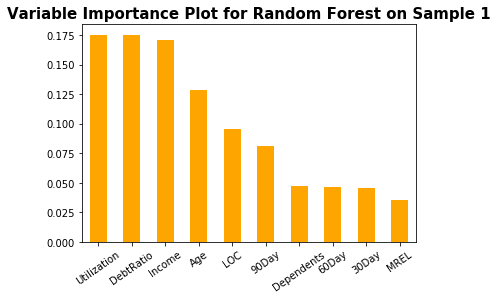

In [893]:
#Variable importances for LoanData1 dataset
RF1class_VarImportance = pd.Series(RF1_class.feature_importances_, index = X1.columns)

#Visualize with bar chart
RF1class_VarImportance.nlargest(10).plot(kind="bar", rot=35, color="orange")
plt.title("Variable Importance Plot for Random Forest on Sample 1", size=15, weight="bold")

Text(0.5, 1.0, 'Variable Importance Plot for Random Forest on Sample 2')

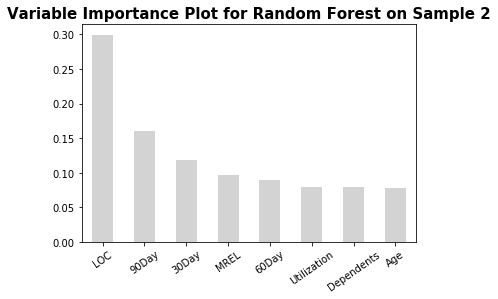

In [894]:
#Variable importances for LoanData2 dataset
RF2class_VarImportance = pd.Series(RF2_class.feature_importances_, index = X2.columns)

#Visualize with bar chart
RF2class_VarImportance.nlargest(10).plot(kind="bar", rot=35, color="lightgray")
plt.title("Variable Importance Plot for Random Forest on Sample 2", size=15, weight="bold")

Text(0.5, 1.0, 'Variable Importance Plot for Random Forest on Sample 3')

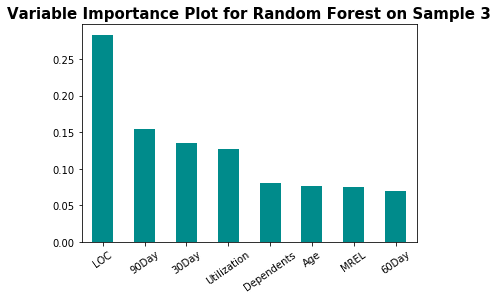

In [891]:
#Variable importances for LoanData3 dataset
RF3class_VarImportance = pd.Series(RF3_class.feature_importances_, index = X3.columns)

#Visualize with bar chart
RF3class_VarImportance.nlargest(10).plot(kind="bar", rot=35, color="darkcyan")
plt.title("Variable Importance Plot for Random Forest on Sample 3", size=15, weight="bold")